In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import json
from scipy.stats import norm, cauchy

plt.style.use('seaborn-v0_8')

In [2]:
stan_file = '../stan/two_state.stan'

model = CmdStanModel(stan_file=stan_file)

21:00:03 - cmdstanpy - INFO - compiling stan file /oscar/data/jpober/jmduchar/Research/mcgill25/rfi_characterization/stan/two_state.stan to exe file /oscar/data/jpober/jmduchar/Research/mcgill25/rfi_characterization/stan/two_state
21:00:15 - cmdstanpy - INFO - compiled model executable: /oscar/data/jpober/jmduchar/Research/mcgill25/rfi_characterization/stan/two_state


In [3]:
data_file = "../data/two_state.data.json"

# fit the model
fit = model.sample(
    data=data_file, 
    show_console=True,
#     iter_sampling=100,
#     iter_warmup=100,
#     adapt_delta=0.99,
    chains=4,
)

21:00:15 - cmdstanpy - INFO - Chain [1] start processing
21:00:15 - cmdstanpy - INFO - Chain [2] start processing
21:00:15 - cmdstanpy - INFO - Chain [3] start processing
21:00:15 - cmdstanpy - INFO - Chain [4] start processing


Chain [3] method = sample (Default)Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = false (Default)
Chain [1] thin = 1 (Default)

Chain [3] sample
Chain [3] num_samples = 1000 (Default)
Chain [3] num_warmup = 1000 (Default)
Chain [3] save_warmup = false (Default)
Chain [2] method = sample (Default)
Chain [2] sample
Chain [2] num_samples = 1000 (Default)
Chain [2] num_warmup = 1000 (Default)
Chain [2] save_warmup = false (Default)
Chain [2] thin = 1 (Default)
Chain [2] adapt
Chain [2] engaged = true (Default)
Chain [2] gamma = 0.05 (Default)
Chain [2] delta = 0.8 (Default)
Chain [2] kappa = 0.75 (Default)
Chain [2] t0 = 10 (Default)
Chain [2] init_buffer = 75 (Default)
Chain [2] term_buffer = 50 (Default)
Chain [2] window = 25 (Default)
Chain [2] save_metric = false (Default)
Chain [2] algorithm = hmc (Default)
Chain [2] hmc
Chain [2] engine = nuts (Default)
Chain [2] nuts
Chain [2] 

Chain [4] Iteration:  100 / 2000 [  5%]  (Warmup)
Chain [4] Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain [2] Iteration:  100 / 2000 [  5%]  (Warmup)
Chain [4] Iteration:  300 / 2000 [ 15%]  (Warmup)
Chain [4] Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain [2] Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain [4] Iteration:  500 / 2000 [ 25%]  (Warmup)
Chain [2] Iteration:  300 / 2000 [ 15%]  (Warmup)
Chain [4] Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain [4] Iteration:  700 / 2000 [ 35%]  (Warmup)
Chain [2] Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain [4] Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain [2] Iteration:  500 / 2000 [ 25%]  (Warmup)
Chain [4] Iteration:  900 / 2000 [ 45%]  (Warmup)
Chain [2] Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain [4] Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain [4] Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain [2] Iteration:  700 / 2000 [ 35%]  (Warmup)
Chain [4] Iteration: 1100 / 2000 [ 55%]  (Sampling)
Chain [2] Iteration:  800 / 2000 [ 40%]  (Warm

21:00:27 - cmdstanpy - INFO - Chain [4] done processing


Chain [3] Iteration:  900 / 2000 [ 45%]  (Warmup)
Chain [4] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [4] 
Chain [4] Elapsed Time: 8.845 seconds (Warm-up)
Chain [4] 3.847 seconds (Sampling)
Chain [4] 12.692 seconds (Total)
Chain [4] 
Chain [4] 
Chain [1] Iteration:  700 / 2000 [ 35%]  (Warmup)
Chain [2] Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain [3] Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain [3] Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain [1] Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain [2] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [1] Iteration:  900 / 2000 [ 45%]  (Warmup)
Chain [3] Iteration: 1100 / 2000 [ 55%]  (Sampling)


21:00:28 - cmdstanpy - INFO - Chain [2] done processing


Chain [2] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [2] 
Chain [2] Elapsed Time: 9.905 seconds (Warm-up)
Chain [2] 3.706 seconds (Sampling)
Chain [2] 13.611 seconds (Total)
Chain [2] 
Chain [2] 
Chain [1] Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain [1] Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain [3] Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain [1] Iteration: 1100 / 2000 [ 55%]  (Sampling)
Chain [3] Iteration: 1300 / 2000 [ 65%]  (Sampling)
Chain [1] Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain [3] Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain [3] Iteration: 1500 / 2000 [ 75%]  (Sampling)
Chain [1] Iteration: 1300 / 2000 [ 65%]  (Sampling)
Chain [3] Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain [1] Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain [3] Iteration: 1700 / 2000 [ 85%]  (Sampling)
Chain [1] Iteration: 1500 / 2000 [ 75%]  (Sampling)
Chain [3] Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain [1] Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain [3] Iteration: 

21:00:32 - cmdstanpy - INFO - Chain [3] done processing


Chain [3] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [3] 
Chain [3] Elapsed Time: 12.935 seconds (Warm-up)
Chain [3] 3.843 seconds (Sampling)
Chain [3] 16.778 seconds (Total)
Chain [3] 
Chain [3] 
Chain [1] Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain [1] Iteration: 1900 / 2000 [ 95%]  (Sampling)


21:00:32 - cmdstanpy - INFO - Chain [1] done processing
21:00:32 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'two_state.stan', line 43, column 2 to column 51)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'two_state.stan', line 43, column 2 to column 51)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'two_state.stan', line 43, column 2 to column 51)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'two_state.stan', line 43, column 2 to column 51)


Chain [1] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 13.663 seconds (Warm-up)
Chain [1] 3.998 seconds (Sampling)
Chain [1] 17.661 seconds (Total)
Chain [1] 
Chain [1] 


In [4]:
print(fit.diagnose())

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Rank-normalized split effective sample size satisfactory for all parameters.

Rank-normalized split R-hat values satisfactory for all parameters.

Processing complete, no problems detected.



In [5]:
fit.draws_pd()

,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,...,viterbi[840],viterbi[841],viterbi[842],viterbi[843],viterbi[844],viterbi[845],viterbi[846],viterbi[847],viterbi[848],log_p_state
0,1.0,1.0,1.0,-818.263,0.996231,0.518824,3.0,7.0,0.0,820.617,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-816.237
1,1.0,2.0,2.0,-818.615,0.912787,0.518824,3.0,7.0,0.0,821.820,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-816.740
2,1.0,3.0,3.0,-820.979,0.867208,0.518824,3.0,7.0,0.0,822.507,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-819.089
3,1.0,4.0,4.0,-823.849,0.956988,0.518824,3.0,7.0,0.0,826.371,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-822.606
4,1.0,5.0,5.0,-823.488,0.937875,0.518824,3.0,7.0,0.0,829.177,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-821.356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4.0,996.0,3996.0,-820.580,0.920698,0.602979,3.0,7.0,0.0,827.560,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-818.762
3996,4.0,997.0,3997.0,-819.076,1.000000,0.602979,3.0,7.0,0.0,822.285,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-817.007
3997,4.0,998.0,3998.0,-820.696,0.972346,0.602979,3.0,7.0,0.0,822.034,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-818.251
3998,4.0,999.0,3999.0,-819.137,0.984200,0.602979,3.0,7.0,0.0,822.359,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,-816.891


In [6]:
fit.metric_type

'diag_e'

In [7]:
fit.metric

array([[4.19055e-02, 4.29399e-02, 4.03851e-05, 7.69685e-04, 1.41859e+02,
        1.10929e-02],
       [3.92434e-02, 4.75165e-02, 3.54388e-05, 6.80450e-04, 1.36724e+02,
        7.66650e-03],
       [3.63992e-02, 5.06185e-02, 3.94948e-05, 7.74852e-04, 1.36453e+02,
        8.96993e-03],
       [4.87833e-02, 4.65822e-02, 3.84780e-05, 6.33009e-04, 1.33853e+02,
        9.79312e-03]])

In [9]:
with open('../data/two_state.data.json') as f:
    input_ = json.load(f)
    
data = np.asarray(input_['y'])

In [10]:
data

array([-2.30896369e-01, -1.69676779e-01, -7.79915565e-02, -3.23777242e-02,
       -3.09914787e-02, -8.74828617e-02, -8.22702183e-02,  1.17037265e-01,
        6.05920931e-02, -3.76516118e-03, -6.84933337e-02,  4.29780891e-02,
       -4.07672687e-02, -1.10284893e-03,  3.27798486e-02,  1.93191166e-01,
        5.21677462e-02, -4.69211769e-02,  2.13530276e-02,  3.03218062e-02,
        6.14753025e-02,  3.46766026e-02, -8.03075902e-02,  2.96928892e-02,
        1.13499279e-01,  1.03320906e-01,  8.55433835e-02,  1.16588062e-01,
        1.14944857e-01,  2.33977315e-02,  3.85887975e-02,  1.14576606e-01,
        1.03828398e-01,  5.12900296e-03,  3.54019989e-02, -7.20274579e-04,
        1.49487630e-01,  2.36440390e-01,  5.01926358e-03, -9.28696838e-03,
       -3.31501387e-02, -4.05715768e-02,  2.95653632e-02, -4.52398063e-02,
       -1.99185960e-02, -2.77794429e-01, -4.62891900e-02, -1.62733810e-02,
       -1.07314488e-01, -1.60323815e-01, -2.54230294e-02, -1.20524965e-01,
        8.53628200e+01,  

In [11]:
viterbi = fit.stan_variable('viterbi')

viterbi.shape

(4000, 848)

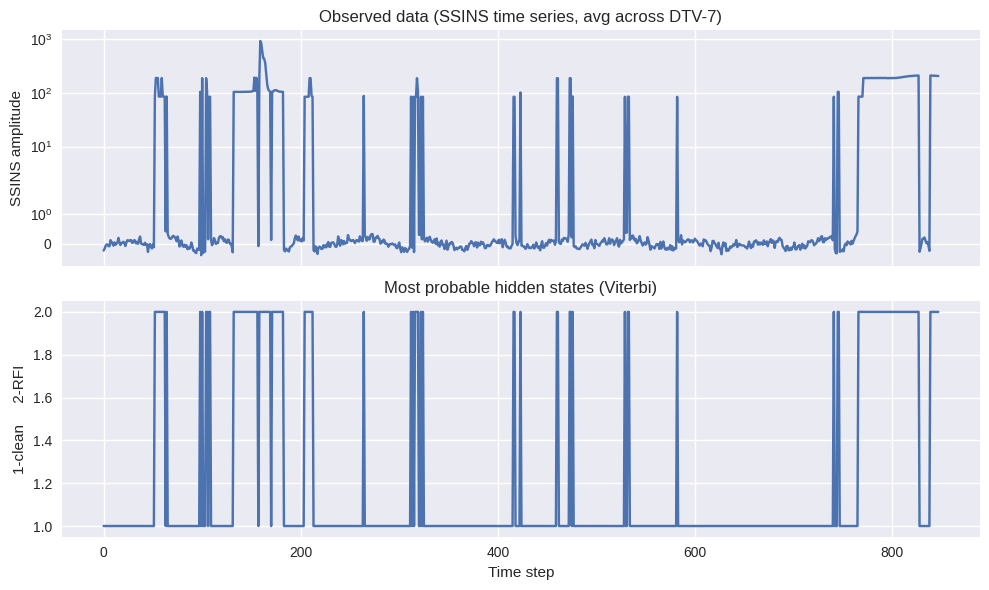

In [46]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 6))

axs[0].plot(data)
axs[0].set_title("Observed data (SSINS time series, avg across DTV-7)")
axs[0].set_yscale("symlog")
axs[0].set_ylabel("SSINS amplitude")

axs[1].plot(viterbi[-1])
axs[1].set_title("Most probable hidden states (Viterbi)")
axs[1].set_ylabel("1-clean     2-RFI")

plt.xlabel("Time step")
plt.tight_layout()
plt.show()

In [8]:
fit.summary()[:11]

,Mean,MCSE,StdDev,MAD,5%,50%,95%,ESS_bulk,ESS_tail,R_hat
lp__,-819.985000,0.039035,1.702200,1.516700,-823.186000,-819.653000,-817.840000,1861.89,2924.47,1.00452
theta_clean[1],0.959517,0.000106,0.007888,0.007827,0.945948,0.960002,0.971851,5557.13,2784.60,1.00064
theta_clean[2],0.040483,0.000106,0.007888,0.007828,0.028148,0.039998,0.054052,5557.28,2784.60,1.00065
theta_rfi[1],0.151528,0.000395,0.027747,0.027590,0.108024,0.149970,0.200079,4954.99,2679.46,1.00315
theta_rfi[2],0.848472,0.000395,0.027747,0.027590,0.799921,0.850030,0.891976,4954.99,2679.46,1.00315
mu_clean,-0.000755,0.000071,0.005307,0.005460,-0.009350,-0.000723,0.007950,5679.82,2778.97,1.00443
sigma_clean,0.138065,0.000050,0.003709,0.003592,0.131894,0.138058,0.144292,5606.93,3104.31,1.00186
mu_rfi,156.032000,0.225112,11.884000,12.546500,135.882000,156.579000,174.847000,2708.39,2395.12,1.00173
sigma_rfi,48.684000,0.088203,4.904990,4.813780,40.350600,48.829100,56.447400,3220.09,1856.21,1.00195
viterbi[1],1.000000,NaN,0.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN


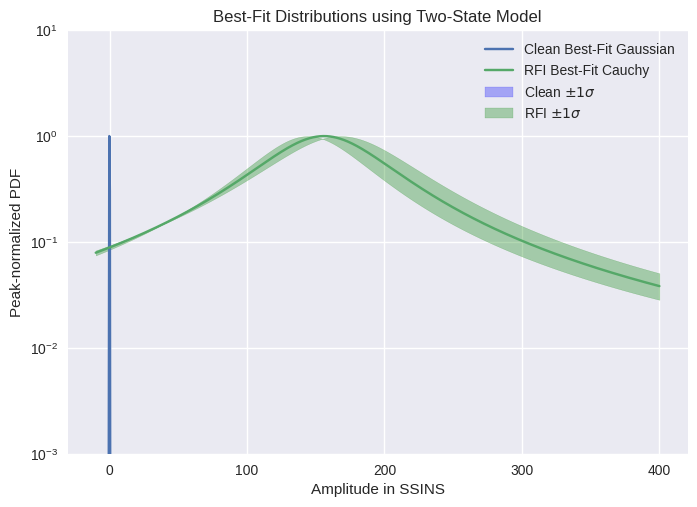

In [52]:
mu_clean      = np.mean(fit.stan_variable('mu_clean'))
sigma_clean   = np.mean(fit.stan_variable('sigma_clean'))
mu_rfi        = np.mean(fit.stan_variable('mu_rfi'))
sigma_rfi     = np.mean(fit.stan_variable('sigma_rfi'))

mu_clean_err      = np.std(fit.stan_variable('mu_clean'))
sigma_clean_err   = np.std(fit.stan_variable('sigma_clean'))
mu_rfi_err        = np.std(fit.stan_variable('mu_rfi'))
sigma_rfi_err     = np.std(fit.stan_variable('sigma_rfi'))


x = np.linspace(-10, 400, 1000)

pdf_norm = norm.pdf(x, loc=mu_clean, scale=sigma_clean)
pdf_cauchy = cauchy.pdf(x, loc=mu_rfi, scale=sigma_rfi)

# peak-normalize
pdf_norm /= np.max(pdf_norm)
pdf_cauchy /= np.max(pdf_cauchy)

# Compute +-1-sigma bounds
pdf_norm_upper = norm.pdf(x, loc=mu_clean + mu_clean_err, scale=sigma_clean + sigma_clean_err)
pdf_norm_lower = norm.pdf(x, loc=mu_clean - mu_clean_err, scale=sigma_clean - sigma_clean_err)
pdf_norm_upper /= np.max(pdf_norm_upper)
pdf_norm_lower /= np.max(pdf_norm_lower)

pdf_cauchy_upper = cauchy.pdf(x, loc=mu_rfi + mu_rfi_err, scale=sigma_rfi + sigma_rfi_err)
pdf_cauchy_lower = cauchy.pdf(x, loc=mu_rfi - mu_rfi_err, scale=sigma_rfi - sigma_rfi_err)
pdf_cauchy_upper /= np.max(pdf_cauchy_upper)
pdf_cauchy_lower /= np.max(pdf_cauchy_lower)

# Plot main PDFs
plt.plot(x, pdf_norm, label="Clean Best-Fit Gaussian")
plt.plot(x, pdf_cauchy, label="RFI Best-Fit Cauchy")

# Shade uncertainty bands
plt.fill_between(x, pdf_norm_lower, pdf_norm_upper, alpha=0.3, color='blue', label=r"Clean $\pm 1 \sigma$")
plt.fill_between(x, pdf_cauchy_lower, pdf_cauchy_upper, alpha=0.3, color='green', label=r"RFI $\pm 1 \sigma$")

# Final plot settings
plt.ylim(1e-3, 10)
plt.yscale("log")
plt.legend()
plt.xlabel("Amplitude in SSINS")
plt.title(r"Best-Fit Distributions using Two-State Model")
plt.ylabel("Peak-normalized PDF")
plt.show()


In [18]:
np.mean(fit.stan_variable('mu_rfi')), np.mean(fit.stan_variable('sigma_rfi'))

(np.float64(156.032385), np.float64(48.684014049999995))